In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning


In [46]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [47]:
# load data
df = pd.read_csv('houses.csv')
df.columns = df.columns.str.lower()

In [48]:
x = df.drop(columns=['price'])
y = df['price']

In [49]:
x_numeric = x.select_dtypes(include=[np.number])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_numeric, y, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [52]:
model = SGDRegressor(max_iter=1
                     , learning_rate='constant'
                     , eta0=0.01
                     , penalty=None
                     , warm_start=True
                     , random_state=42)

In [53]:
epochs = 1000 # nums of epoch

rmse_list = []  # for error after each epoch

In [54]:
for epoch in range(epochs):
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

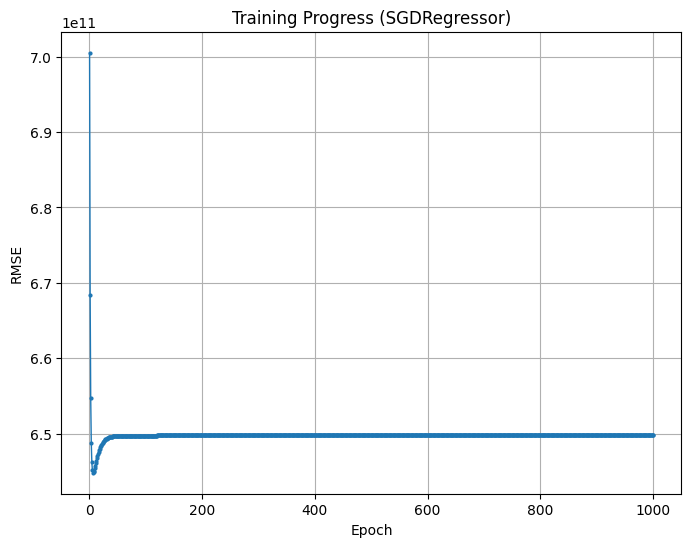

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs+1), rmse_list, marker='o', markersize=2, linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training Progress (SGDRegressor)')
plt.grid(True)
plt.show()

In [56]:
example_house = x_train.mean().to_dict()
example_house['area'] = 1000
example_house['no. of bedrooms'] = 3

example_df = pd.DataFrame([example_house])
example_scaled = scaler.transform(example_df)

special_prediction = model.predict(example_scaled)[0]


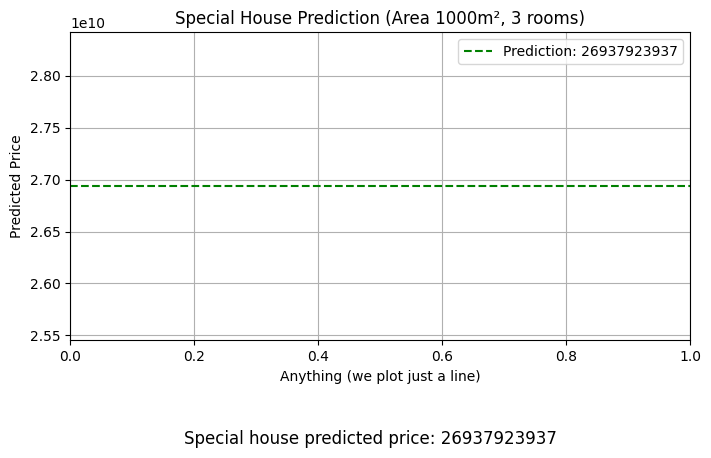

In [57]:
plt.figure(figsize=(8, 4))
plt.axhline(y=special_prediction, color='green', linestyle='--', label=f'Prediction: {special_prediction:.0f}')
plt.xlabel('Anything (we plot just a line)')
plt.ylabel('Predicted Price')
plt.title('Special House Prediction (Area 1000m², 3 rooms)')
plt.legend()
plt.grid(True)

# Текст под графиком
plt.figtext(0.5, -0.15, f'Special house predicted price: {special_prediction:.0f}', ha='center', fontsize=12)

plt.show()

In [58]:
plt.figtext(0.5, -0.15, f'Special house predicted price: {special_prediction:.0f}', ha='center', fontsize=12)

plt.show()

<Figure size 640x480 with 0 Axes>